MACHINE LEARNING PROJECT - HOUSING PRICE PREDICTION

DESCRIPTION: 
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearess to mainroad,v.v.... The dataset is small yet, it's complexity aries due to the fact that it has strong multicollinearity. 

1. Data Exploration

In [2]:
# Importing the basic libraries 

import os 
import math 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from datetime import datetime 

from statsmodels.formula import api
from sklearn.feature_selection import RFE 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.decomposition import PCA 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10,6]

In [3]:
# Importing the dataset 
df = pd.read_csv('/Users/hungtran/Documents/Tài liệu/Housing.csv')

display(df.head())

target = 'price'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)
original_df.shape

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


(545, 13)

In [4]:
# Cheking the dtypes of all the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Checking the number of unique rows in each features

df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [6]:
df[features].shape

(545, 12)

In [7]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:
        cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 11 categorical features.


In [8]:
# Checking the stats of all columns 

display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


2. Exploratory data analysis (EDA)

/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


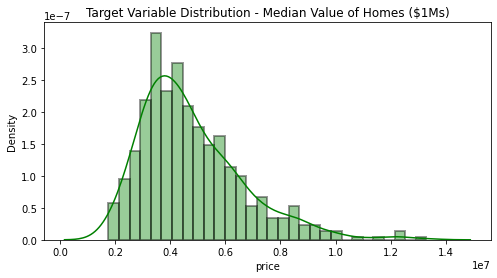

In [9]:
# Let first analyze the distribution of the target value 

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

The target variables seems to be normally distributed, averaging around 20 units.

                               Visualising Categorical Features:                                


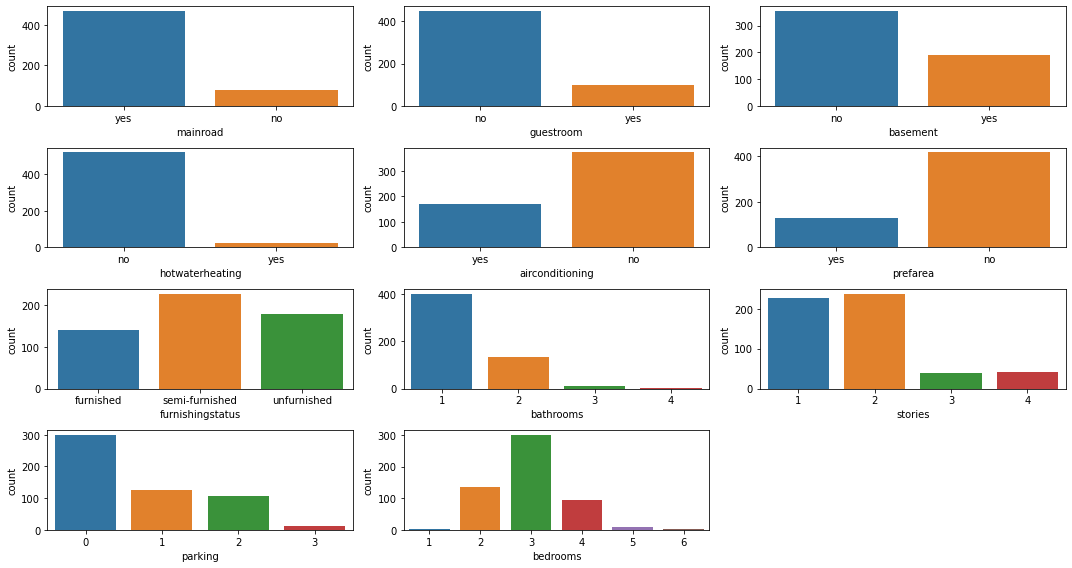

In [10]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,2*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(x=df[cf[i]])
    else:
        plt.subplot(3,1,3)
        sns.countplot(x=df[cf[i]])
        
plt.tight_layout()
plt.show()


                                                Numeric Features Distribution                                                 


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


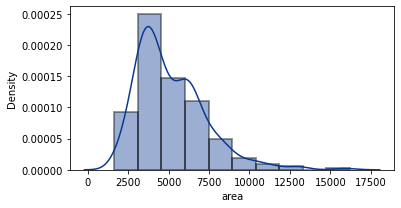

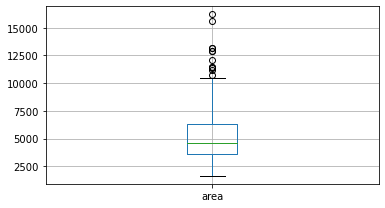

In [11]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

There are some outliers 

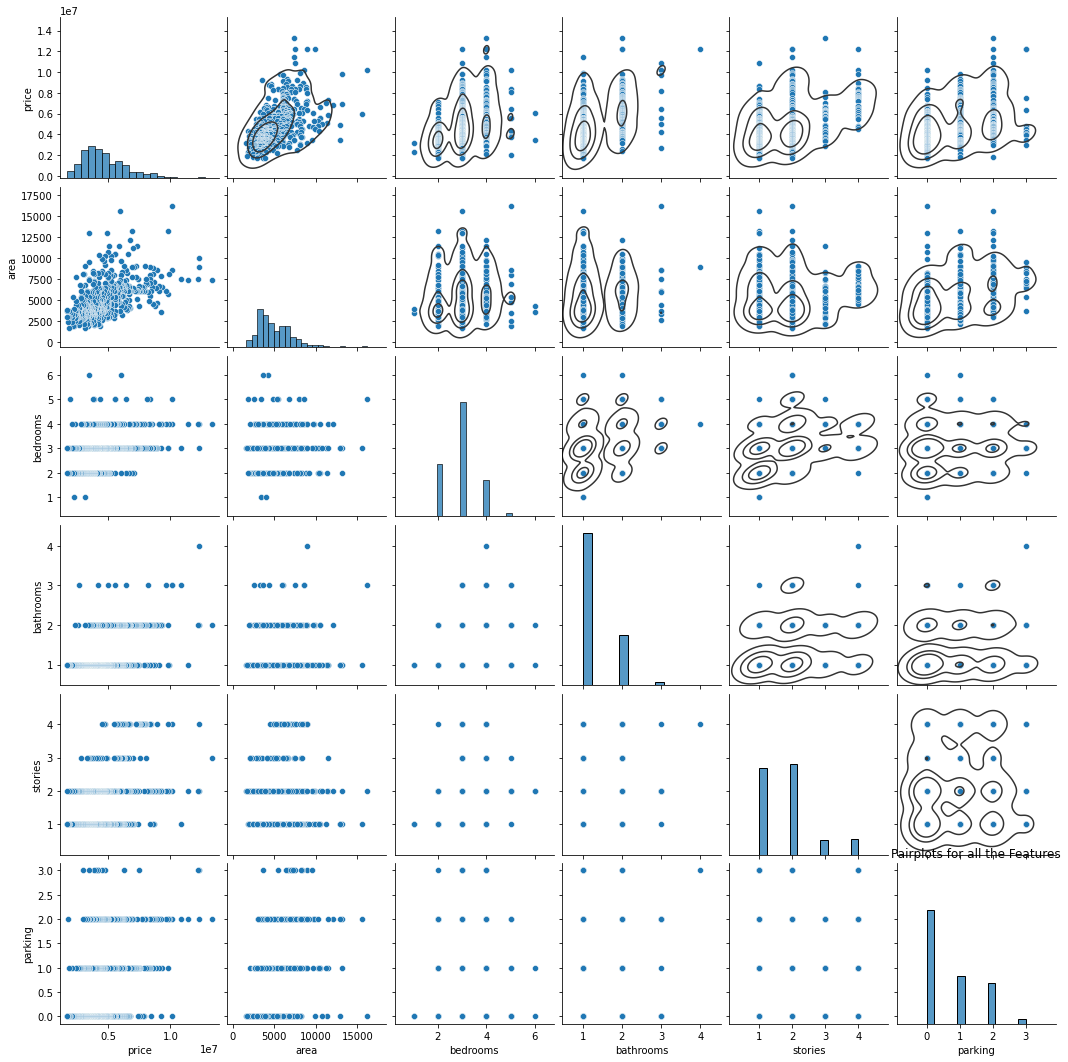

In [12]:
# Understanding the relationship between all the features 

g = sns.pairplot(df)
plt.title('Pairplots for all the Features')
g.map_upper(sns.kdeplot, levels = 4, color = ".2")
plt.show()

3. Data Preprocessing

In [13]:
# Remove all the duplicate rows 

counter = 0  

rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape == (rs, cs):
    print('The dataset does not have any duplicate rows')
else: 
    print(f'Number of duplicates dropped: {rs - df.shape[0]}')

The dataset does not have any duplicate rows


In [14]:
# Check for empty elements 

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [15]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


One-Hot Encoding on features:
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


(545, 24)

In [16]:
# Remove outliers 

df1 = df3.copy()

features1 = nf 

for i in features1: 
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1 
    df1 = df1[df1[i] <= (Q3 + (1.5 * IQR))]
    df1 = df1[df1[i] >= (Q1 - (1.5 * IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())

print(f'Before removal of outliers, the dataset has {df3.shape[0]} sample')
print(f'After removal of outliers, the dataset has {df1.shape[0]} sample')


,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Before removal of outliers, the dataset has 545 sample
After removal of outliers, the dataset has 533 sample


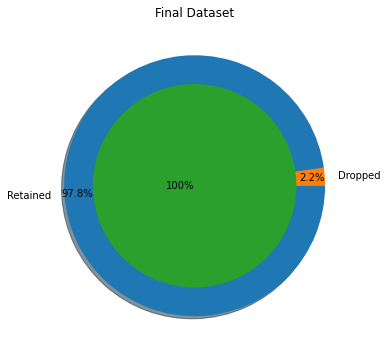


Inference: After the cleanup process, 12 samples were dropped, while retaining 2.2% of the data.


In [17]:
# Final dataset size after performing Preprocessing 

df = df1.copy()
df.columns = [i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')


4. Data Manipulation 

In [18]:
# Spliting data into trainning and testing sets 
m = []
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m 

X = df.drop([target], axis = 1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y,test_size=0.2, train_size=0.8,random_state=100)
Train_X.reset_index(drop=True, inplace = True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (533, 23) (533,) 
Training set  --->  (426, 23) (426,) 
Testing set   --->  (107, 23)  (107,)


In [19]:
# Features Scaling 

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std,columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardization on Testing set'.center(120))
Test_X_std = std.fit_transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-8.808812e-17,-9.799152e-17,-1.334353e-16,-7.192994e-17,2.384634e-17,1.720064e-17,-1.224894e-16,-1.866009e-16,3.648620e-18,1.334353e-16,...,-8.470011e-18,-2.137049e-16,5.003822e-17,-1.824310e-18,1.015098e-16,3.440128e-17,-3.961359e-17,-4.691083e-18,1.609302e-16,4.173435e-16
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-1.797874e+00,-2.335497e+00,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
25%,-7.487891e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
50%,-2.551019e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
75%,6.110159e-01,4.281744e-01,-4.659859e-01,1.322266e+00,-2.038745e-01,1.468181e+00,-5.393599e-01,1.186077e+00,1.429286e+00,1.150196e+00,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,1.674387e+00,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
max,2.992840e+00,4.281744e-01,2.145988e+00,1.322266e+00,4.904979e+00,1.468181e+00,1.854050e+00,1.186077e+00,1.429286e+00,1.726647e+00,...,3.699953e+00,3.633180e+00,1.829464e+00,2.032863e+00,6.806859e+00,1.674387e+00,9.275031e-01,2.180999e+00,6.806859e+00,2.061553e+01



                                            Standardization on Testing set                                           


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,...,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,107.0,1.070000e+02
mean,1.130975e-16,1.359245e-16,2.490220e-17,1.172479e-16,1.037592e-16,1.452628e-17,4.357885e-17,-5.187958e-17,4.772921e-17,-7.885696e-17,...,1.971424e-17,-9.442084e-17,-1.660147e-17,2.490220e-17,2.173754e-16,1.431876e-16,-1.141351e-17,1.037592e-16,0.0,8.119154e-17
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,...,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,0.0,1.004706e+00
min,-1.634284e+00,-2.954196e+00,-4.794633e-01,-6.386664e-01,-2.645751e-01,-6.824613e-01,-5.665577e-01,-8.683884e-01,-7.120690e-01,-5.521576e-01,...,-3.030458e-01,-3.385016e-01,-5.521576e-01,-4.794633e-01,-1.698416e-01,-5.087470e-01,-1.219989e+00,-4.646602e-01,0.0,-9.712859e-02
25%,-8.220476e-01,3.385016e-01,-4.794633e-01,-6.386664e-01,-2.645751e-01,-6.824613e-01,-5.665577e-01,-8.683884e-01,-7.120690e-01,-5.521576e-01,...,-3.030458e-01,-3.385016e-01,-5.521576e-01,-4.794633e-01,-1.698416e-01,-5.087470e-01,-1.219989e+00,-4.646602e-01,0.0,-9.712859e-02
50%,-2.228567e-01,3.385016e-01,-4.794633e-01,-6.386664e-01,-2.645751e-01,-6.824613e-01,-5.665577e-01,-8.683884e-01,-7.120690e-01,-5.521576e-01,...,-3.030458e-01,-3.385016e-01,-5.521576e-01,-4.794633e-01,-1.698416e-01,-5.087470e-01,8.196798e-01,-4.646602e-01,0.0,-9.712859e-02
75%,7.251964e-01,3.385016e-01,-4.794633e-01,1.565763e+00,-2.645751e-01,1.465285e+00,-5.665577e-01,1.151558e+00,1.404358e+00,-5.521576e-01,...,-3.030458e-01,-3.385016e-01,-5.521576e-01,-4.794633e-01,-1.698416e-01,-5.087470e-01,8.196798e-01,-4.646602e-01,0.0,-9.712859e-02
max,2.796533e+00,3.385016e-01,2.085665e+00,1.565763e+00,3.779645e+00,1.465285e+00,1.765045e+00,1.151558e+00,1.404358e+00,1.811077e+00,...,3.299832e+00,2.954196e+00,1.811077e+00,2.085665e+00,5.887841e+00,1.965613e+00,8.196798e-01,2.152110e+00,0.0,1.029563e+01


5. Feature Selection / Extraction   

                                       Correlation Matrix                                       


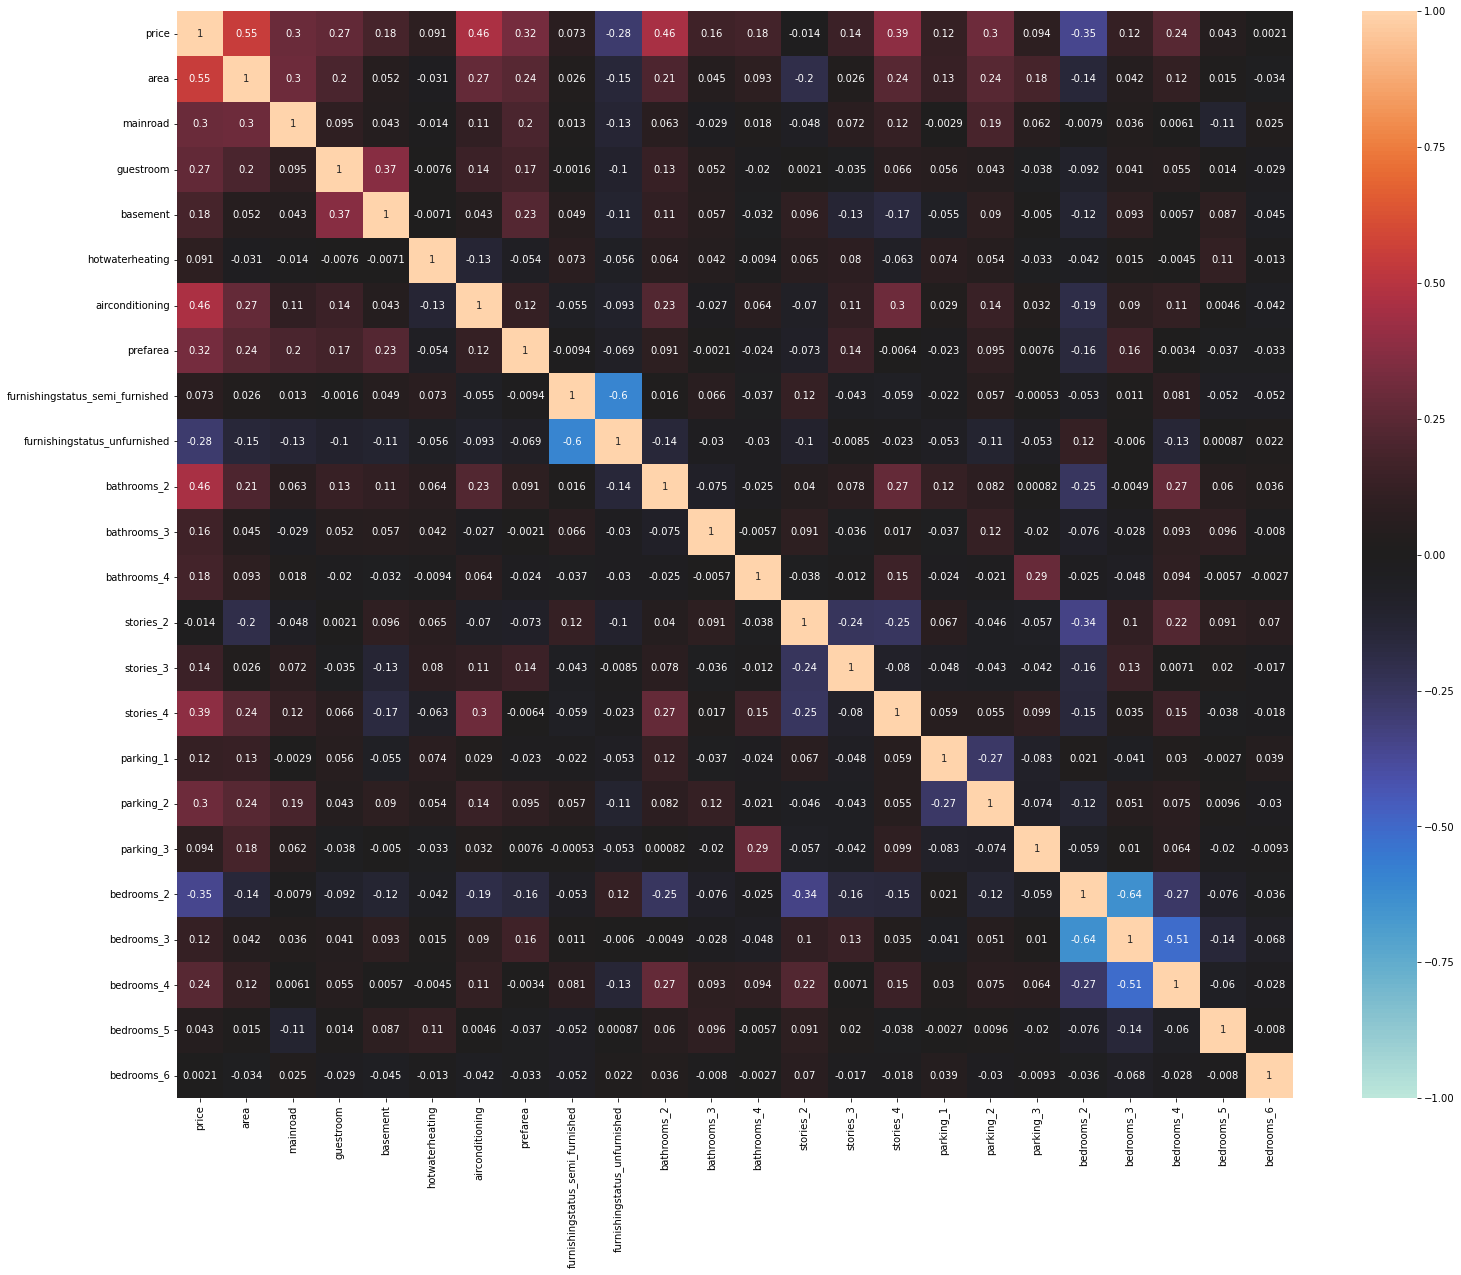

In [20]:
# Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))

plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [21]:
# Testing a Linear Regression model with statsmodels 

Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values 

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     36.96
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           2.06e-84
Time:                        22:44:40   Log-Likelihood:                -6509.2
No. Observations:                 426   AIC:                         1.307e+04
Df Residuals:                     402   BIC:                         1.316e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.717e+06   5.22e+04     90.378      0.000    4.61e+06    4.82e+06
area                             4.356e+05   6.41e+04      6.799      0.000     3.1e+05    5.62e+05
mainroad                         1.785e+05   5.77e+04      3.092      0.002     6.5e+04    2.92e+05
guestroom                        1.197e+05   5.78e+04      2.071      0.039    6082.572    2.33e+05
basement                         1.712e+05   6.15e+04      2.784      0.006    5.03e+04    2.92e+05
hotwaterheating                  2.006e+05   5.48e+04      3.662      0.000    9.29e+04    3.08e+05
airconditioning                  3.635e+05   5.89e+04      6.168      0.000    2.48e+05    4.79e+05
prefarea                         2.711e+05   5.75e+04      4.711      0.000    1.58e+05    3.84e+05
furnishingstatus_semi_furnished  1.509e+04   6.71e+04      0.225      0.822   -1.17e+05    1.47e+05
furnishingstatus_unfurnished    -1.688e+05   6.78e+04     -2.489      0.013   -3.02e+05   -3.55e+04
bathrooms_2                      3.722e+05   5.98e+04      6.224      0.000    2.55e+05     4.9e+05
bathrooms_3                      1.886e+05    5.4e+04      3.492      0.001    8.24e+04    2.95e+05
bathrooms_4                      2.801e+05   5.68e+04      4.934      0.000    1.69e+05    3.92e+05
stories_2                        1.341e+05   6.97e+04      1.923      0.055   -2986.085    2.71e+05
stories_3                        2.289e+05   6.13e+04      3.735      0.000    1.08e+05    3.49e+05
stories_4                        3.725e+05   6.46e+04      5.764      0.000    2.45e+05       5e+05
parking_1                         1.67e+05   5.78e+04      2.887      0.004    5.33e+04    2.81e+05
parking_2                        2.781e+05   5.97e+04      4.662      0.000    1.61e+05    3.95e+05
parking_3                       -5.772e+04   5.72e+04     -1.009      0.314    -1.7e+05    5.47e+04
bedrooms_2                      -3.385e+04    4.8e+05     -0.070      0.944   -9.78e+05    9.11e+05
bedrooms_3                       1.077e+05   5.45e+05      0.197      0.844   -9.64e+05    1.18e+06
bedrooms_4                       1.215e+05   4.18e+05      0.291      0.771      -7e+05    9.43e+05
bedrooms_5                       3.933e+04   1.66e+05      0.237      0.812   -2.86e+05    3.65e+05
bedrooms_6                       8.462e+04   7.49e+04      1.130      0.259   -6.26e+04    2.32e+05
==============================================================================
Omnibus:                       96.025   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.474
Skew:                           1.058   Prob(JB):                     2.51e-60
Kurtosis:                       6.315   Cond. No.                  

We can fix these multicollineariry with three techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition 

5.a Manual Method - VIF 

Drop Features:  ['bedrooms_3', 'stories_2', 'furnishingstatus_unfurnished', 'area', 'basement', 'bathrooms_2', 'airconditioning', 'bedrooms_2', 'parking_2', 'bathrooms_4', 'prefarea', 'hotwaterheating', 'mainroad', 'furnishingstatus_semi_furnished', 'bathrooms_3', 'stories_4', 'stories_3', 'parking_1', 'bedrooms_4']


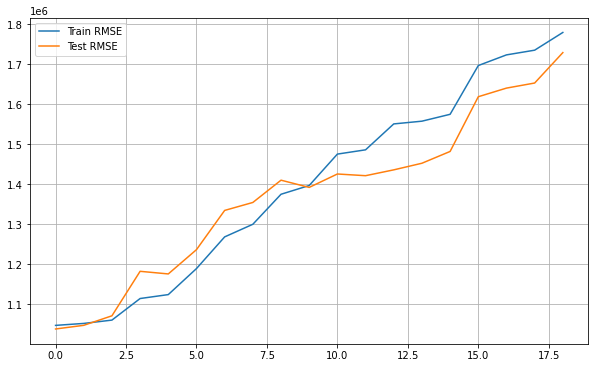

In [22]:
from sklearn.preprocessing import PolynomialFeatures
Trr= []
Tss = []
n = 3 
order=['ord-'+str(i) for i in range(2,n)]

DROP = []
b = []

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP, axis=1)
    vif['Features'] = X.columns 
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP, axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))


print('Drop Features: ', DROP)
plt.plot(Trr, label = 'Train RMSE')
plt.plot(Tss, label = 'Test RMSE')

plt.legend()
plt.grid()
plt.show()


5.b Automatic Method - RFE 

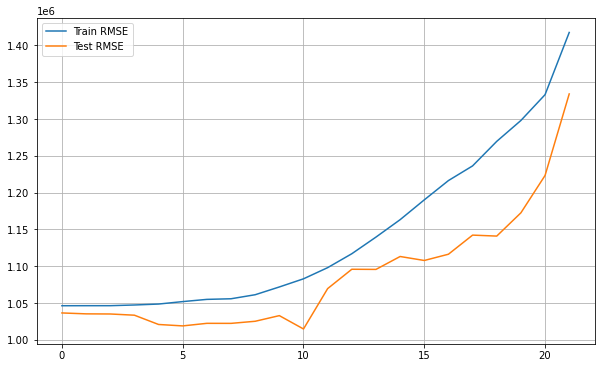

In [23]:
from sklearn.preprocessing import PolynomialFeatures
Trr =[]
Tss = []
n = 3 

order = ['ord-'+str(i) for i in range(2,n)]

Trd = pd.DataFrame(np.zeros((10, n-2)), columns= order)
Tsd = pd.DataFrame(np.zeros((10, n-2)), columns = order)

m = df.shape[1] - 2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1]-i)
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label = 'Train RMSE')
plt.plot(Tss, label = 'Test RMSE')

plt.legend()
plt.grid()
plt.show()

5.c Feature Elmination using PCA Decomposition 

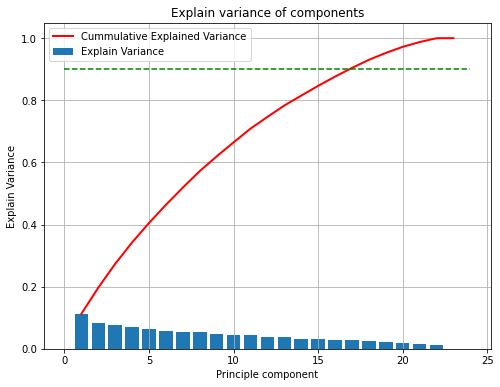

In [24]:
from sklearn.decomposition import PCA 

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize = (8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw = 2, label = 'Explain Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label = 'Cummulative Explained Variance', color = 'red')
plt.plot([0,pca.n_components_+1], [0.9, 0.9], 'g--')
ax.set_title('Explain variance of components')
ax.set_xlabel('Principle component')
ax.set_ylabel('Explain Variance')
plt.legend()
plt.grid()
plt.show()

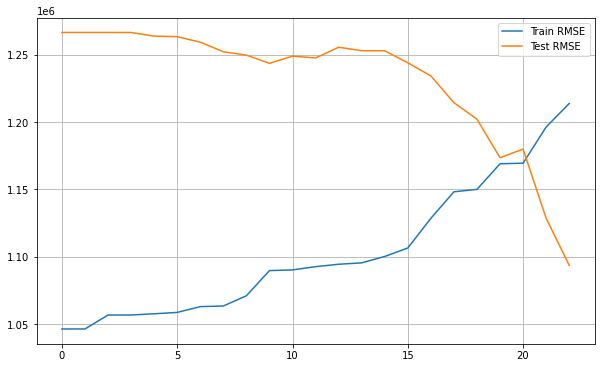

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label = 'Train RMSE')
plt.plot(Tss, label = 'Test RMSE')
plt.legend()
plt.grid()
plt.show()

Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique. But let skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [26]:
# Shorting list selected features (with RFE)

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1]-5)
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

1052002.1523301557
1018980.4719322961


6.Predictive Model 

In [28]:
#Let first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()


Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

6a. Multiple Linear Regression (MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 435611.63113764  178535.44953021  119686.65946275  171210.9185958
  200580.08990409  363541.1687388   271064.49093887   15090.75518422
 -168847.55659801  372226.35414826  188596.74408113  280136.78367031
  134056.09983255  228899.77069     372492.97268413  166960.27915495
  278131.13351884  -57715.22044274  -33851.66099925  107659.40113262
  121541.66765655   39328.91553165   84618.74056581]
The Intercept of the Regresion Model was found to be  4716708.779342723


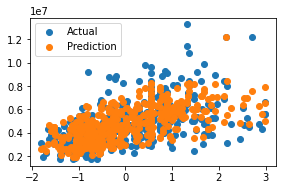



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6789097089550895
Residual Sum of Squares (RSS) on Training set  ---> 466429810296572.75
Mean Squared Error (MSE) on Training set       ---> 1094905657973.1754
Root Mean Squared Error (RMSE) on Training set ---> 1046377.3974877207

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6895695805386057
Residual Sum of Squares (RSS) on Training set  ---> 114972423841697.95
Mean Squared Error (MSE) on Training set       ---> 1074508634034.5603
Root Mean Squared Error (RMSE) on Training set ---> 1036585.0828728728

--------------------Residual Plots--------------------


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


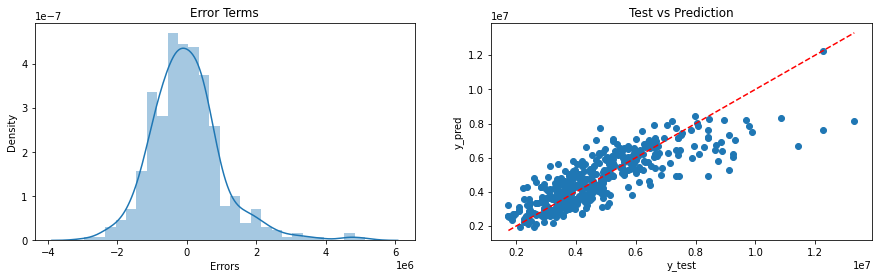

In [29]:
MLR = LinearRegression().fit(Train_X_std, Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

6b. Ridge Regession Model 

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 435611.63113764  178535.44953021  119686.65946275  171210.9185958
  200580.08990409  363541.1687388   271064.49093887   15090.75518422
 -168847.55659801  372226.35414826  188596.74408113  280136.78367031
  134056.09983255  228899.77069     372492.97268413  166960.27915495
  278131.13351884  -57715.22044274  -33851.66099925  107659.40113262
  121541.66765655   39328.91553165   84618.74056581]
The Intercept of the Regresion Model was found to be  4716708.779342723


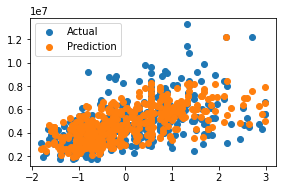



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6789060979912986
Residual Sum of Squares (RSS) on Training set  ---> 466435055740620.5
Mean Squared Error (MSE) on Training set       ---> 1094917971222.1139
Root Mean Squared Error (RMSE) on Training set ---> 1046383.281222571

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6894749185999239
Residual Sum of Squares (RSS) on Training set  ---> 115007483268395.47
Mean Squared Error (MSE) on Training set       ---> 1074836292227.9954
Root Mean Squared Error (RMSE) on Training set ---> 1036743.1177625416

--------------------Residual Plots--------------------


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


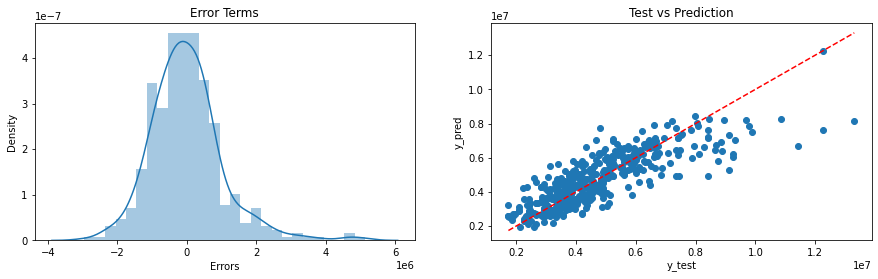

In [30]:
# Creating a Ridge Regression Model 

RLR = Ridge().fit(Train_X_std, Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

6c. Lassso Regression Model 

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 435611.63113764  178535.44953021  119686.65946275  171210.9185958
  200580.08990409  363541.1687388   271064.49093887   15090.75518422
 -168847.55659801  372226.35414826  188596.74408113  280136.78367031
  134056.09983255  228899.77069     372492.97268413  166960.27915495
  278131.13351884  -57715.22044274  -33851.66099925  107659.40113262
  121541.66765655   39328.91553165   84618.74056581]
The Intercept of the Regresion Model was found to be  4716708.779342723


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.000e+12, tolerance: 1.453e+11
  model = cd_fast.enet_coordinate_descent(


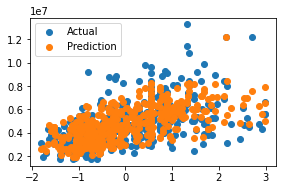

/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6789097088318172
Residual Sum of Squares (RSS) on Training set  ---> 466429810475643.44
Mean Squared Error (MSE) on Training set       ---> 1094905658393.5292
Root Mean Squared Error (RMSE) on Training set ---> 1046377.3976885823

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.689569325574203
Residual Sum of Squares (RSS) on Training set  ---> 114972518271475.2
Mean Squared Error (MSE) on Training set       ---> 1074509516555.843
Root Mean Squared Error (RMSE) on Training set ---> 1036585.5085596379

--------------------Residual Plots--------------------


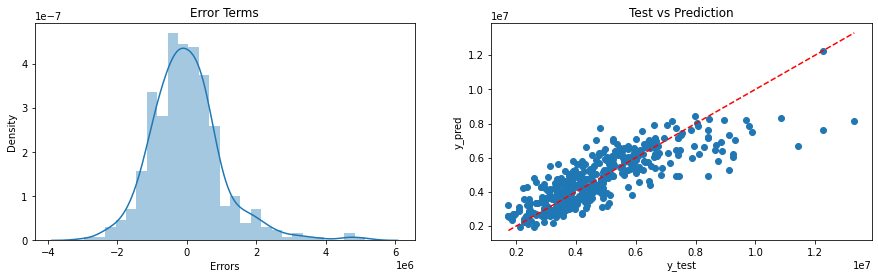

In [31]:
# Creating a Lasso regression model 

LLR = Lasso().fit(Train_X_std, Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

6d. Elastic-net regression 

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 435611.63113764  178535.44953021  119686.65946275  171210.9185958
  200580.08990409  363541.1687388   271064.49093887   15090.75518422
 -168847.55659801  372226.35414826  188596.74408113  280136.78367031
  134056.09983255  228899.77069     372492.97268413  166960.27915495
  278131.13351884  -57715.22044274  -33851.66099925  107659.40113262
  121541.66765655   39328.91553165   84618.74056581]
The Intercept of the Regresion Model was found to be  4716708.779342723


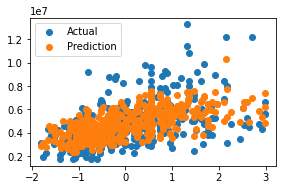



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6518476052536579
Residual Sum of Squares (RSS) on Training set  ---> 505741406591209.25
Mean Squared Error (MSE) on Training set       ---> 1187186400448.8481
Root Mean Squared Error (RMSE) on Training set ---> 1089580.8370418637

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6668518423758
Residual Sum of Squares (RSS) on Training set  ---> 123386268803511.16
Mean Squared Error (MSE) on Training set       ---> 1153142699098.2354
Root Mean Squared Error (RMSE) on Training set ---> 1073844.8207717144

--------------------Residual Plots--------------------


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


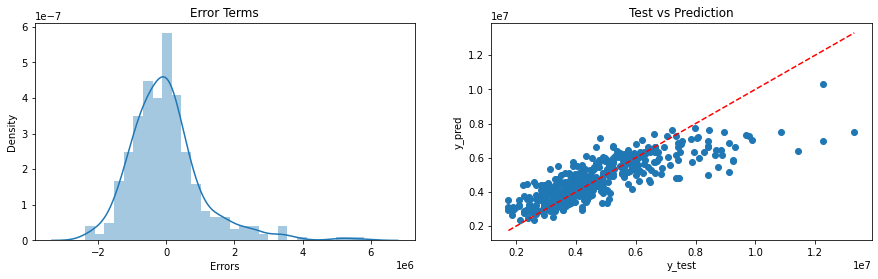

In [32]:
 #Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

6e. Polynominal Regression model 

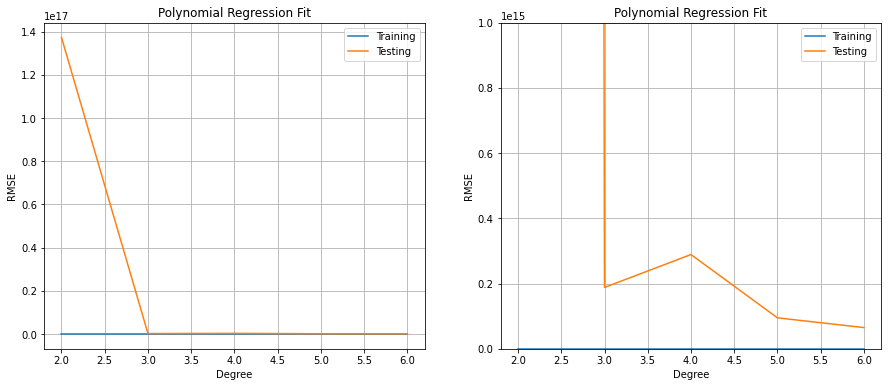

In [33]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,1e15])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 435611.63113764  178535.44953021  119686.65946275  171210.9185958
  200580.08990409  363541.1687388   271064.49093887   15090.75518422
 -168847.55659801  372226.35414826  188596.74408113  280136.78367031
  134056.09983255  228899.77069     372492.97268413  166960.27915495
  278131.13351884  -57715.22044274  -33851.66099925  107659.40113262
  121541.66765655   39328.91553165   84618.74056581]
The Intercept of the Regresion Model was found to be  4716708.779342723


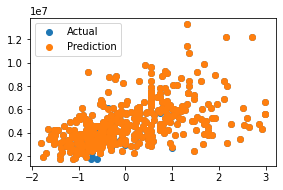



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9953436811003655
Residual Sum of Squares (RSS) on Training set  ---> 6763972632025.577
Mean Squared Error (MSE) on Training set       ---> 15877870028.229057
Root Mean Squared Error (RMSE) on Training set ---> 126007.4205284318

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -2602820756460376.5
Residual Sum of Squares (RSS) on Training set  ---> 9.639925485232513e+29
Mean Squared Error (MSE) on Training set       ---> 9.009276154422911e+27
Root Mean Squared Error (RMSE) on Training set ---> 94917206840608.78

--------------------Residual Plots--------------------


/Users/hungtran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


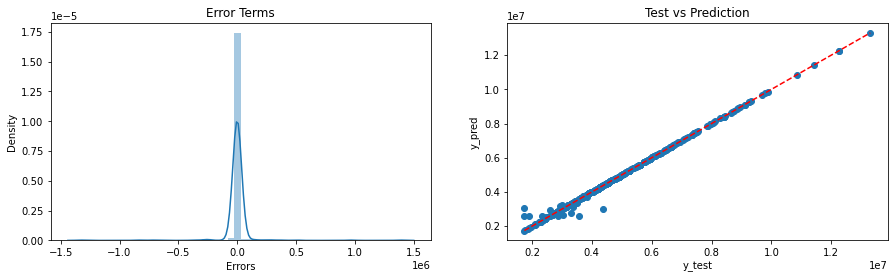

In [34]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

6f. Comparing the evaluation metics of the models 

In [35]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.678910,6.895696e-01,4.664298e+14,1.149724e+14,1.094906e+12,1.074509e+12,1.046377e+06,1.036585e+06
Ridge Linear Regression (RLR),0.678906,6.894749e-01,4.664351e+14,1.150075e+14,1.094918e+12,1.074836e+12,1.046383e+06,1.036743e+06
Lasso Linear Regression (LLR),0.678910,6.895693e-01,4.664298e+14,1.149725e+14,1.094906e+12,1.074510e+12,1.046377e+06,1.036586e+06
Elastic-Net Regression (ENR),0.651848,6.668518e-01,5.057414e+14,1.233863e+14,1.187186e+12,1.153143e+12,1.089581e+06,1.073845e+06
Polynomial Regression (PNR),0.995344,-2.602821e+15,6.763973e+12,9.639925e+29,1.587787e+10,9.009276e+27,1.260074e+05,9.491721e+13


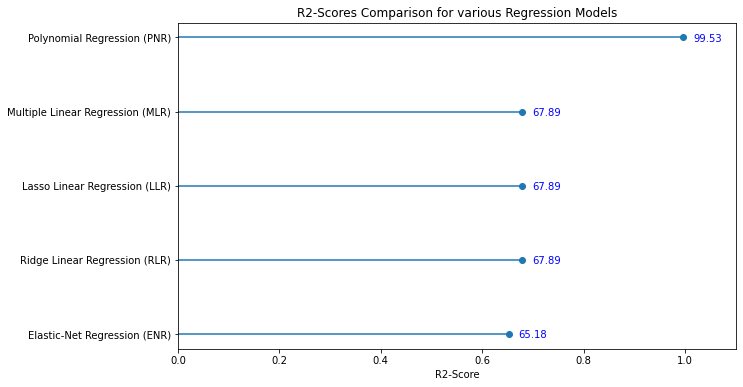

In [36]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

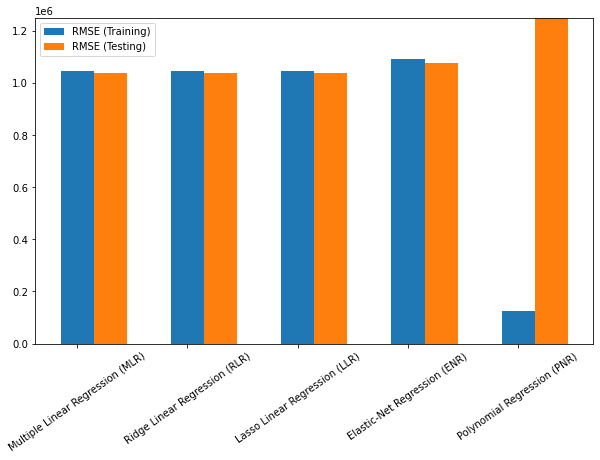

In [37]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,1.25e6])
plt.show()

 Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple MLR Model gave the best results.